# Evaluating Logistic Regression with ROC Curve and AUC Score

This notebook is part of my internship deliverable at Flexisaf, focused on demonstrating practical understanding of advanced machine learning techniques. The task involves training models that showcase at least two advanced concepts covered in the Microsoft Learn path on machine learning.

## Objective
To apply and evaluate two advanced machine learning techniques using real-world data:
- **Random Forest Classifier** with hyperparameter tuning and feature importance analysis
- **Logistic Regression** with ROC curve and AUC score evaluation

## Dataset
I used the **Breast Cancer Wisconsin Diagnostic Dataset**, which contains 30 features derived from digitized images of breast mass samples. The goal is to classify tumors as either **malignant** or **benign**, making this a binary classification problem.

## Techniques Demonstrated
- Ensemble learning with Random Forests
- Model evaluation using confusion matrix and classification report
- Probability-based evaluation using ROC curves and AUC scores
- Feature scaling and preprocessing for linear models

This notebook is structured to walk through data preparation, model training, evaluation, and interpretation for each technique. It reflects both technical implementation and conceptual understanding.


## Load our Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


## Standardize our Features

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train the Model

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [10]:
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [11]:
y_prob

array([8.85345694e-01, 8.74244925e-06, 3.06418819e-03, 9.99498478e-01,
       9.99940150e-01, 9.10729855e-11, 1.50144666e-09, 3.52284199e-02,
       6.20835667e-01, 9.99254633e-01, 9.50603391e-01, 1.23648774e-02,
       9.93995981e-01, 1.45551837e-01, 9.98383327e-01, 8.33096440e-04,
       9.98156737e-01, 9.99988653e-01, 9.99999183e-01, 1.11170313e-06,
       9.16075330e-01, 9.90095713e-01, 4.29067033e-09, 9.99922952e-01,
       9.98868985e-01, 9.99444948e-01, 9.98925771e-01, 9.94073730e-01,
       9.97134878e-01, 7.96109152e-06, 9.99503583e-01, 9.99853698e-01,
       9.97778990e-01, 9.94515299e-01, 9.99859792e-01, 9.97543215e-01,
       5.80030771e-02, 9.97036851e-01, 8.80986585e-05, 9.52142903e-01,
       9.99929030e-01, 3.95760388e-04, 9.97521965e-01, 9.99041284e-01,
       9.79818050e-01, 9.26189413e-01, 9.99580570e-01, 9.99501781e-01,
       9.69137274e-01, 9.99395952e-01, 1.18647099e-04, 5.12479055e-08,
       6.89946450e-01, 9.86996427e-01, 9.99974266e-01, 9.90465353e-01,
      

Now let's see the perfomance with confusion matrix and classfication report.

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Plot ROC Curve and Calculate AUC

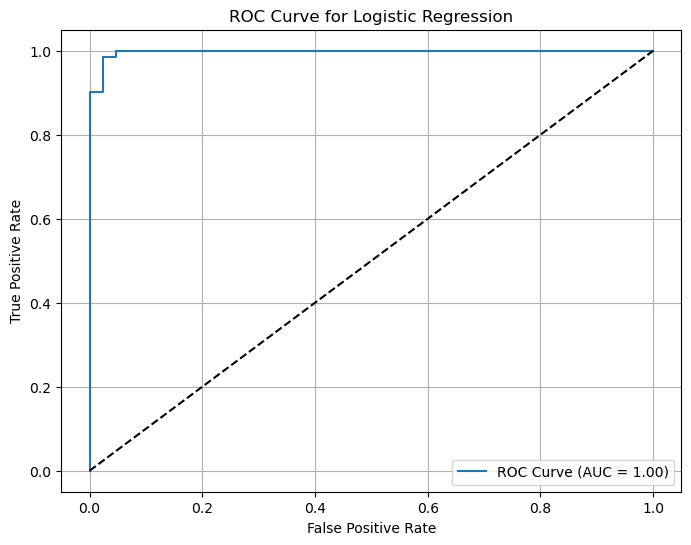

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()



After fitting the model, I evaluated its performance using a confusion matrix and classification report. To demonstrate a more advanced evaluation technique, I plotted the ROC curve and calculated the AUC score. The ROC curve shows the trade-off between sensitivity and specificity, while the AUC score summarizes the model’s ability to distinguish between classes.

This model provides a strong baseline for binary classification and highlights the importance of using probability-based metrics in medical diagnosis tasks.
